# Unspervised learning project 1

In [1]:
from kohonen import *
from Supplementary import *
import numpy as np

In [2]:
name = "Stettler"
nameDigit = name2digits(name)
print(nameDigit)

[0 4 7 8]


### import data

In [3]:
data = np.loadtxt("data.txt")
labels = np.loadtxt("labels.txt")

In [4]:
data_filtered, labels_flitered = filterData(data,labels,name)
print(np.shape(data_filtered))
#visualizeSample(data[0])

target digits = [0 4 7 8]
(2000, 784)


(4, 784)


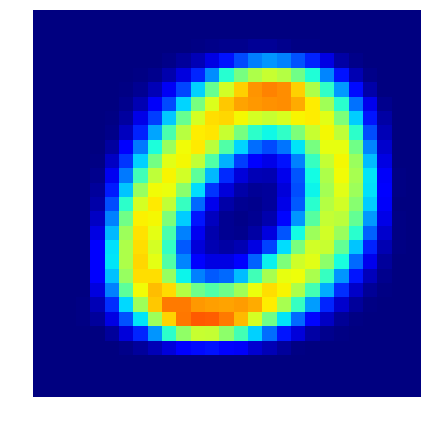

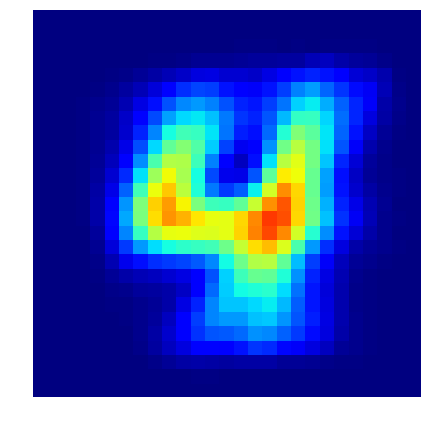

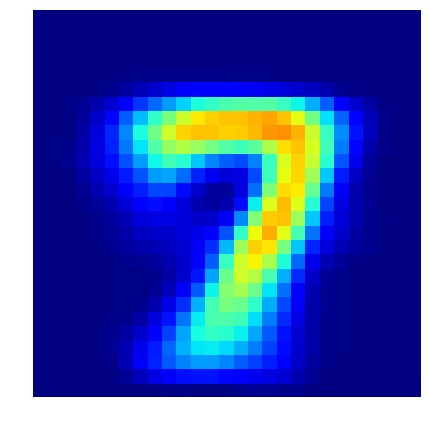

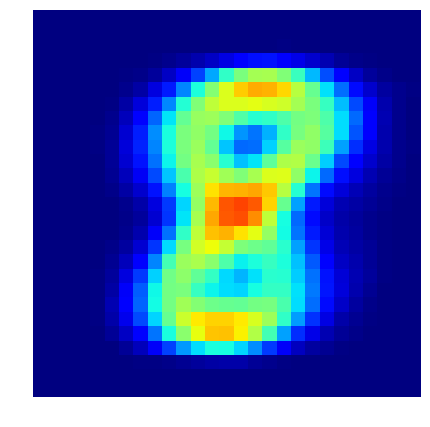

In [5]:
average_digit = averageSample(data_filtered, labels_flitered, nameDigit)
visualizeSample(average_digit)

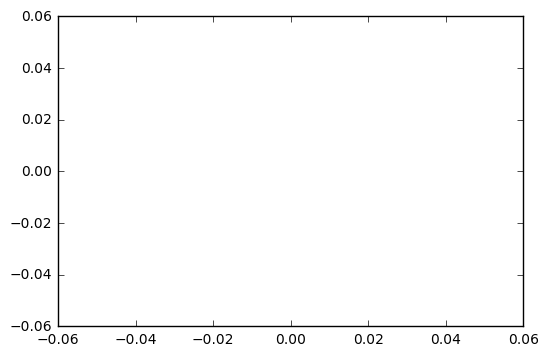

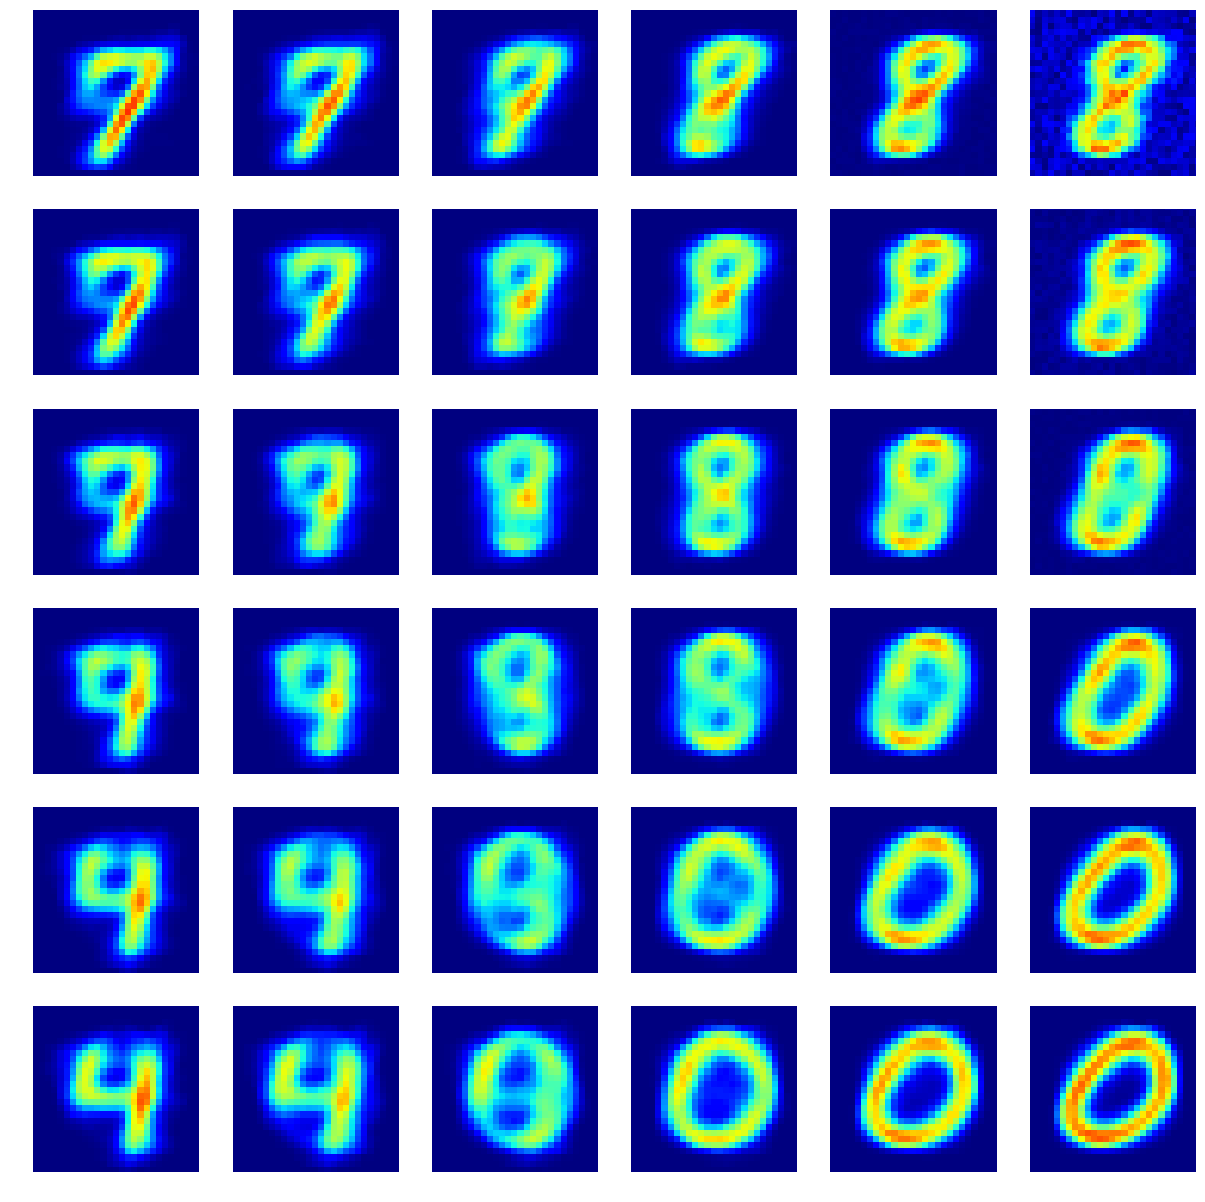

In [5]:
centers = run_kohonen(data_filtered, size_k=6, sigma=1.2, eta=0.01, tmax=8000)
visualizeSample(centers, size_k=6)

In [12]:
digits = []
for center in centers:
    rmses = []
    for digit in average_digit:
        rmses.append(distance_btw_Sample(center,digit))
    
    digits.append(nameDigit[np.argmin(rmses)])
    
print(digits)

[7, 7, 7, 4, 8, 8, 7, 7, 8, 4, 8, 8, 7, 7, 4, 4, 0, 8, 4, 7, 8, 8, 0, 0, 4, 4, 8, 0, 0, 0, 4, 4, 8, 0, 0, 0]


# for loop on parameters

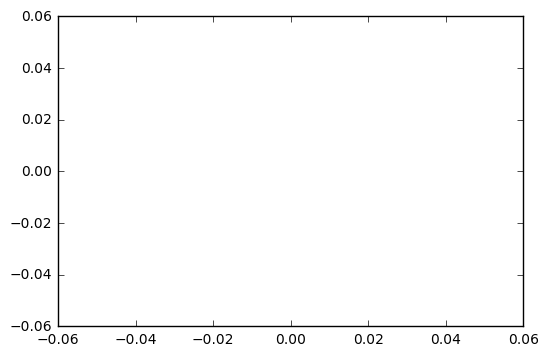

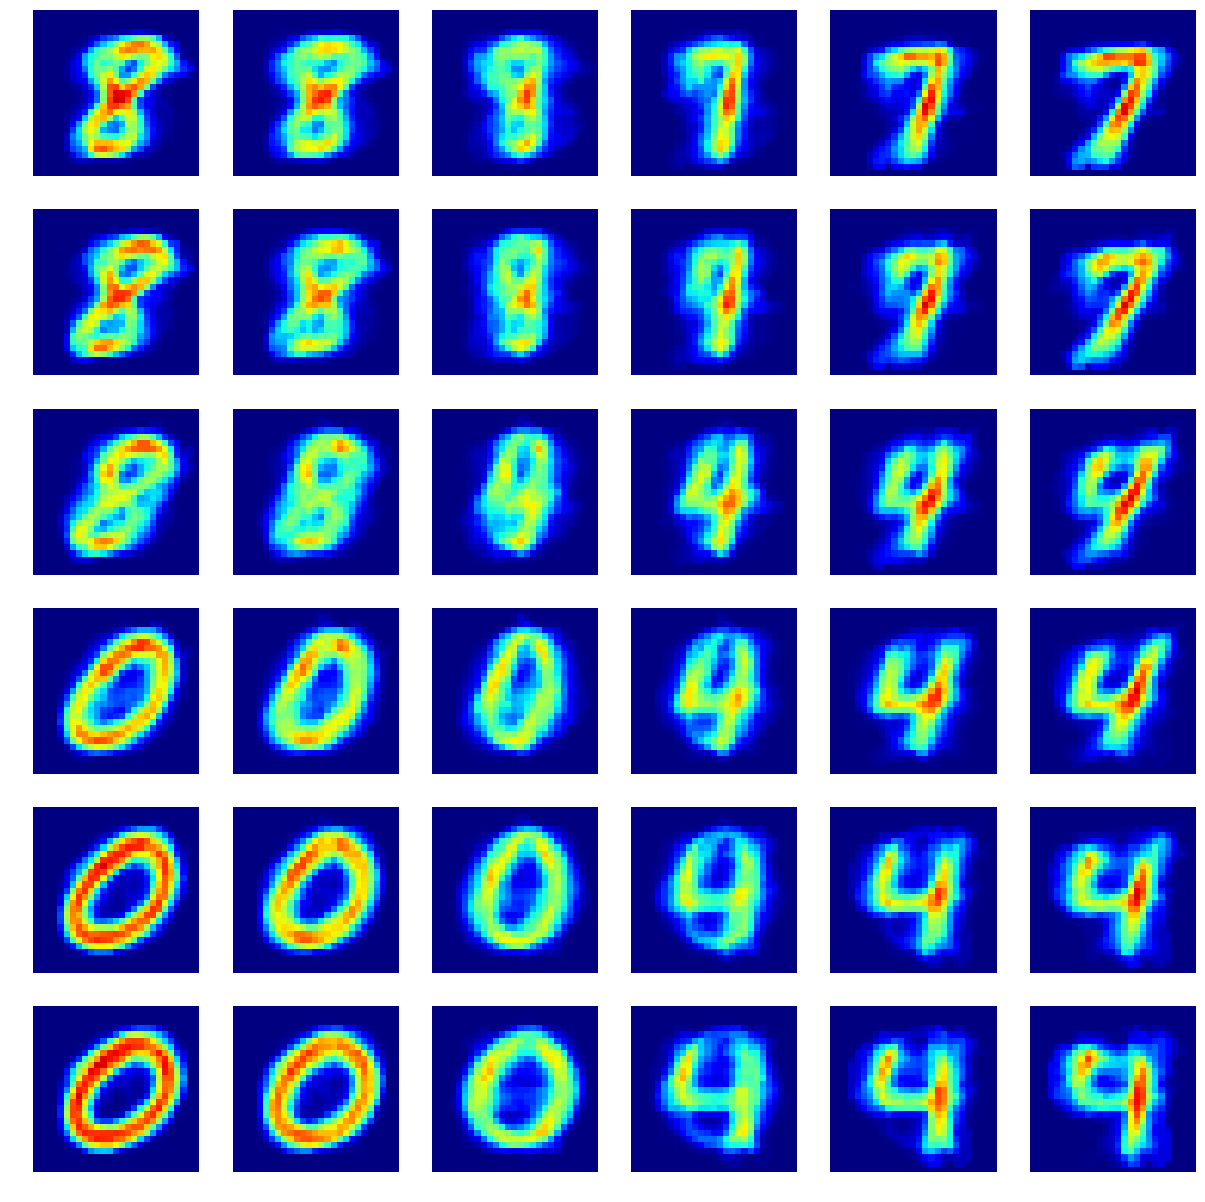

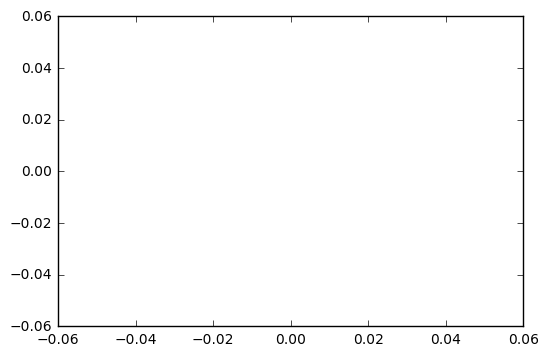

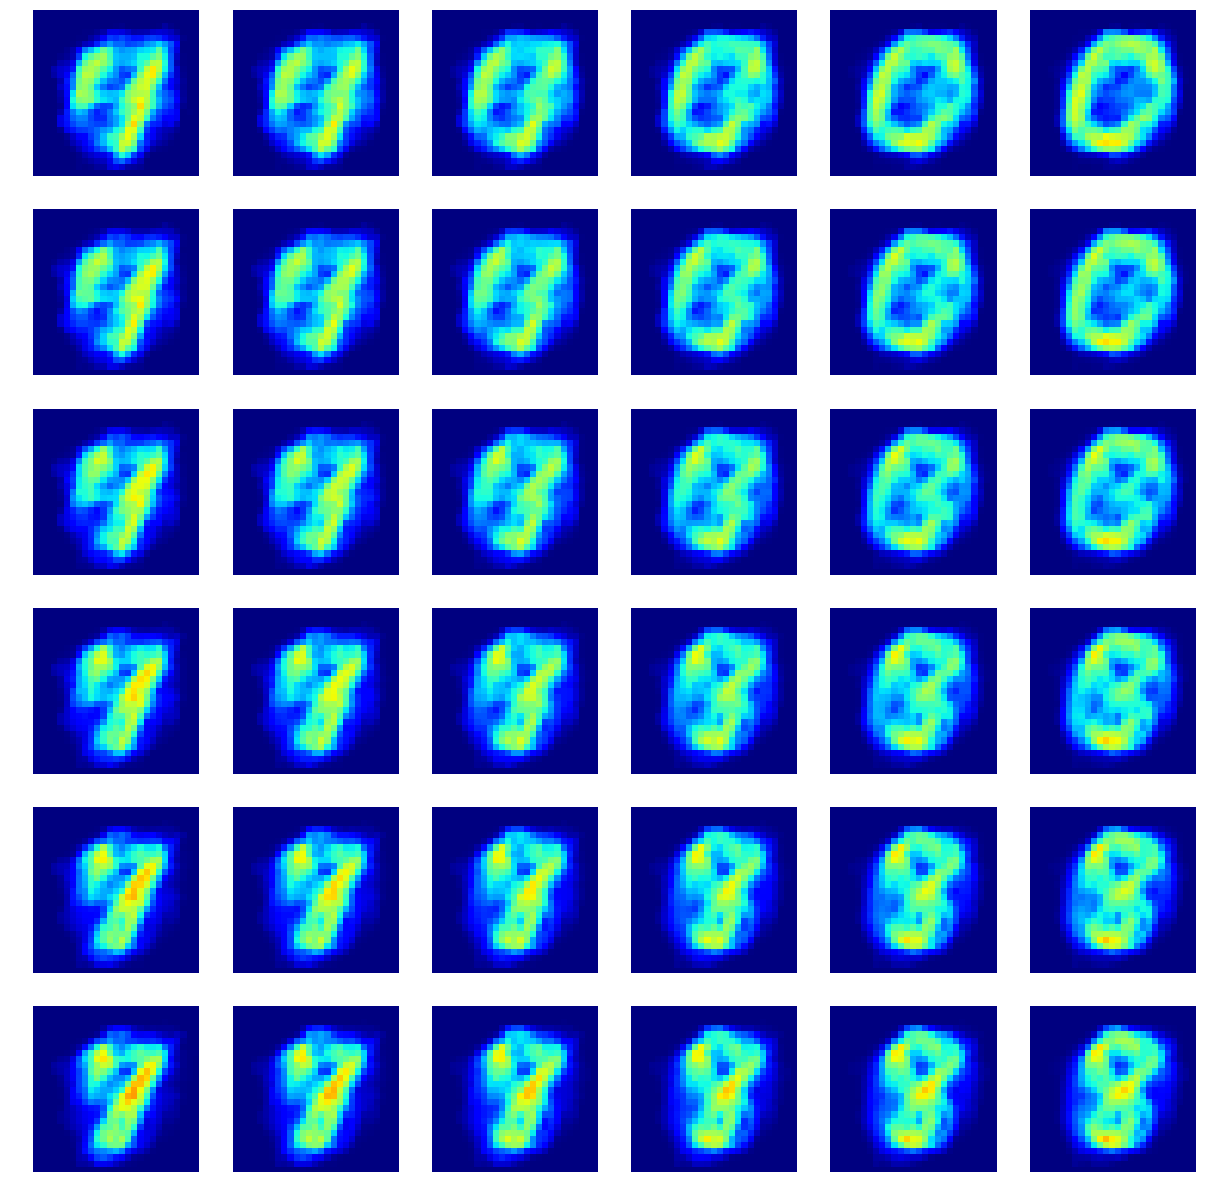

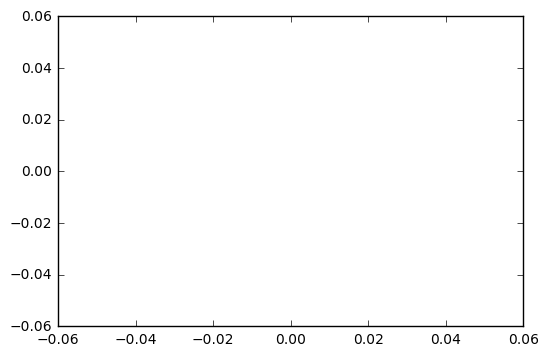

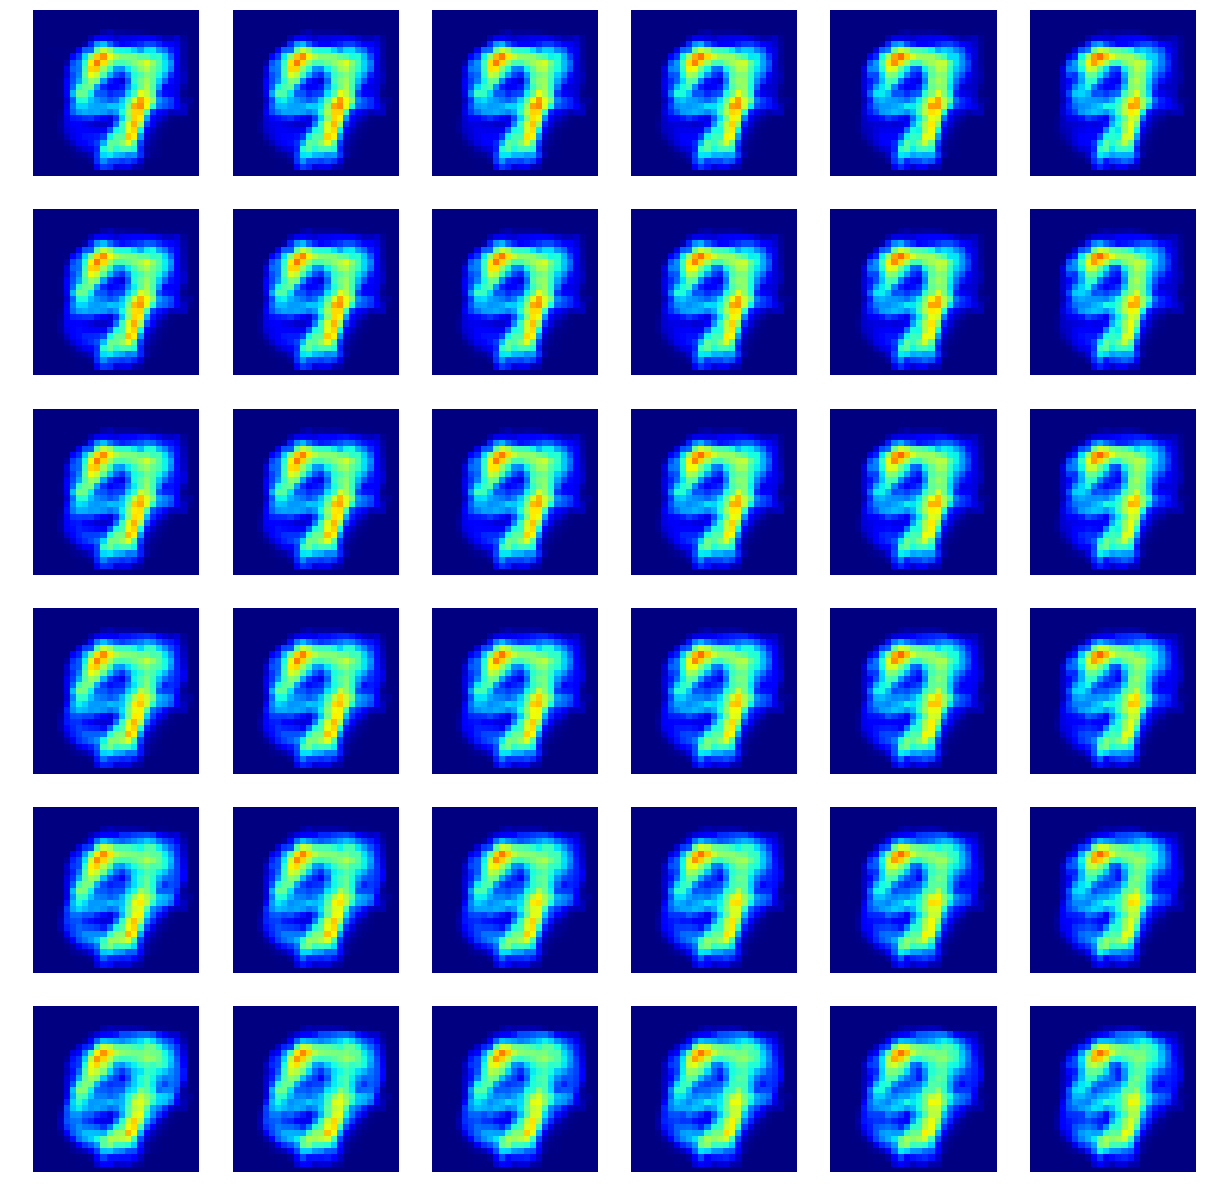

In [26]:
sigma = [1,3,5]
for s in sigma:
    centers = run_kohonen(data_filtered, size_k=6, sigma=s, eta=0.1, tmax=8000)
    visualizeSample(centers, size_k=6)

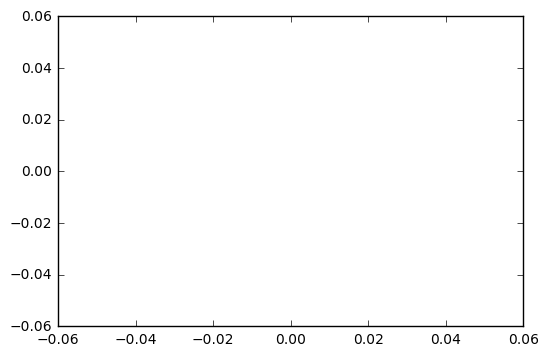

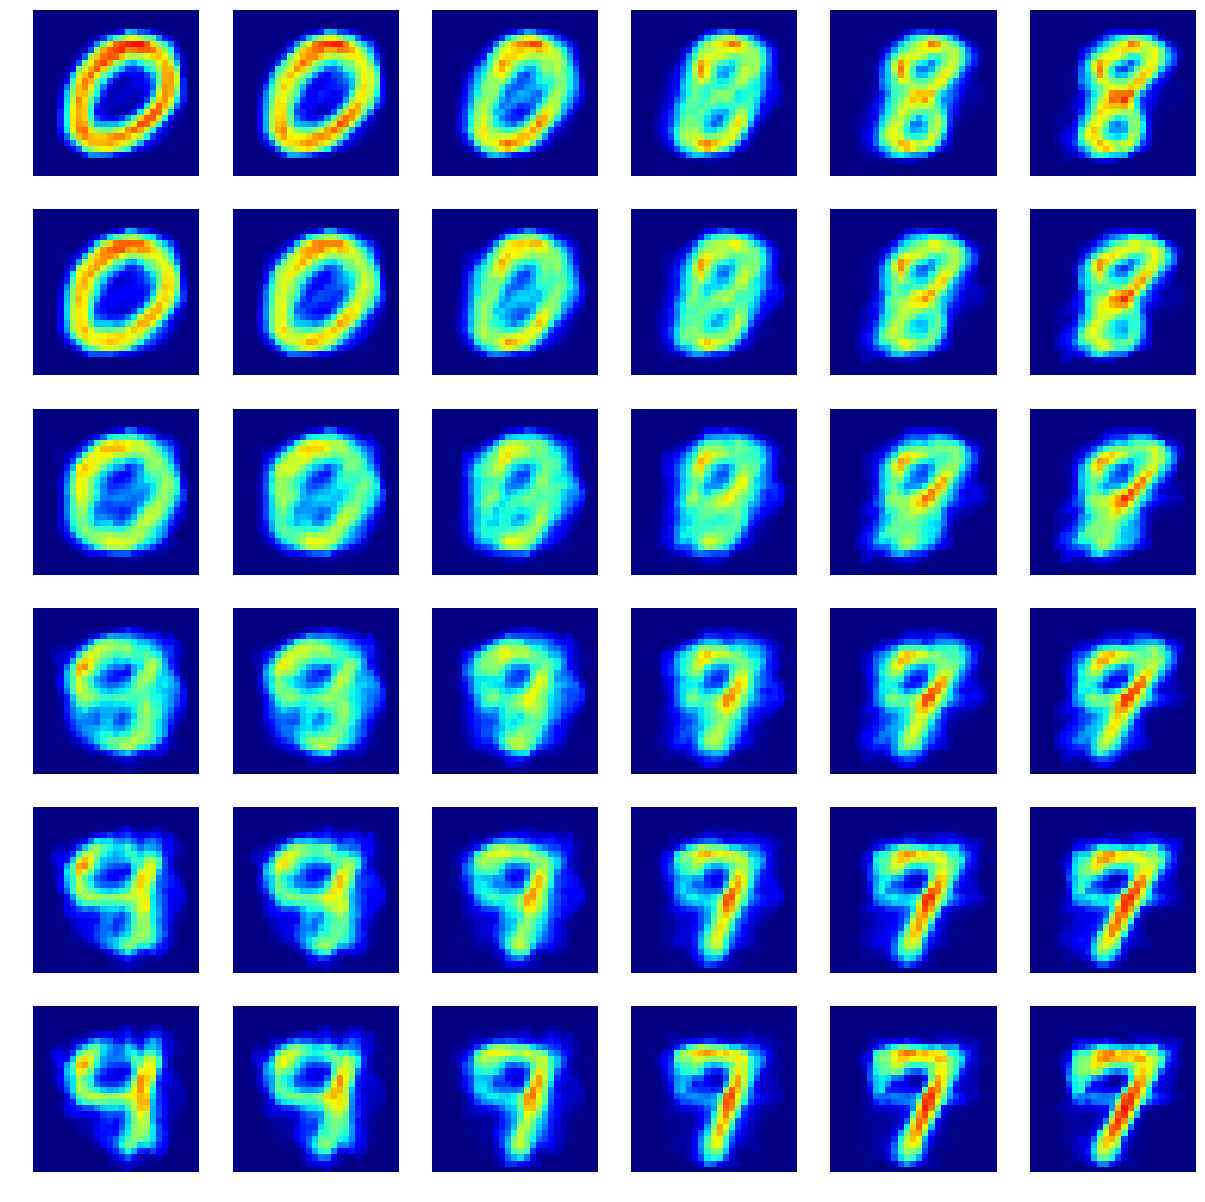

ValueError: num must be 1 <= num <= 36, not 37

In [27]:
size = [6,7,8]
for s in size:
    centers = run_kohonen(data_filtered, size_k=s, sigma=1.5, eta=0.1, tmax=8000)
    visualizeSample(centers, size_k=6)

# Best parameters

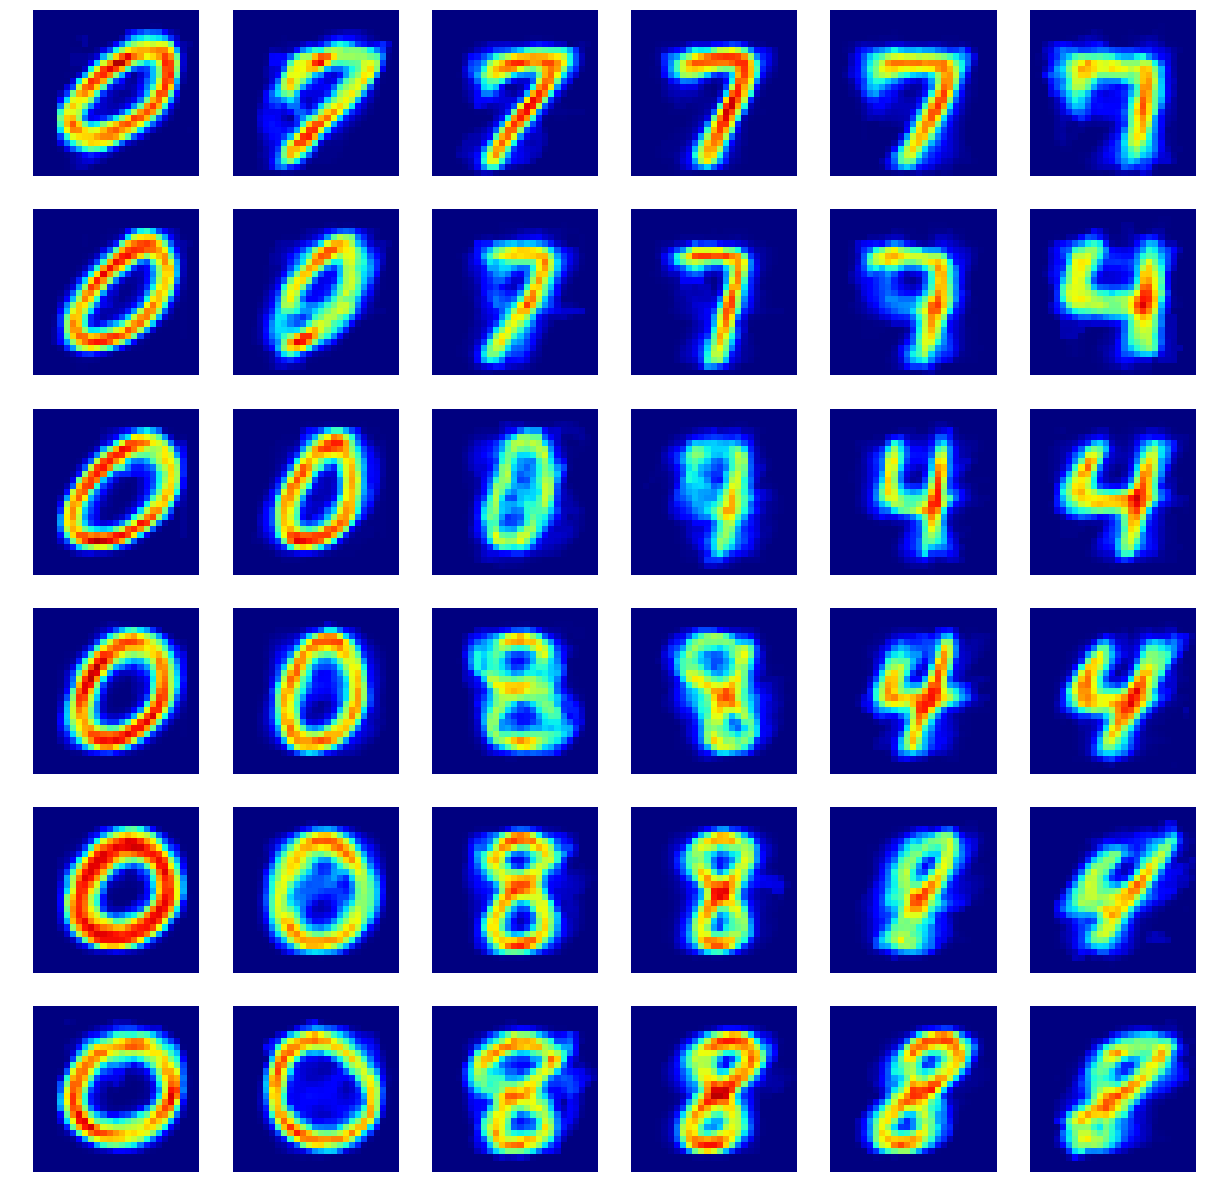

In [25]:
tmax = 10000
sigma_init = 2
#fun = lambda x: -sigma_init/tmax*x + sigma_init #linear
fun = lambda x: np.exp(-np.power(x,2)/(tmax*1e6))/1.8 #gaussian
centers = run_kohonen_dynamicLearningRate(data_filtered,fun,size_k=6, eta=0.1, tmax=tmax)
visualizeSample(centers, size_k=6)

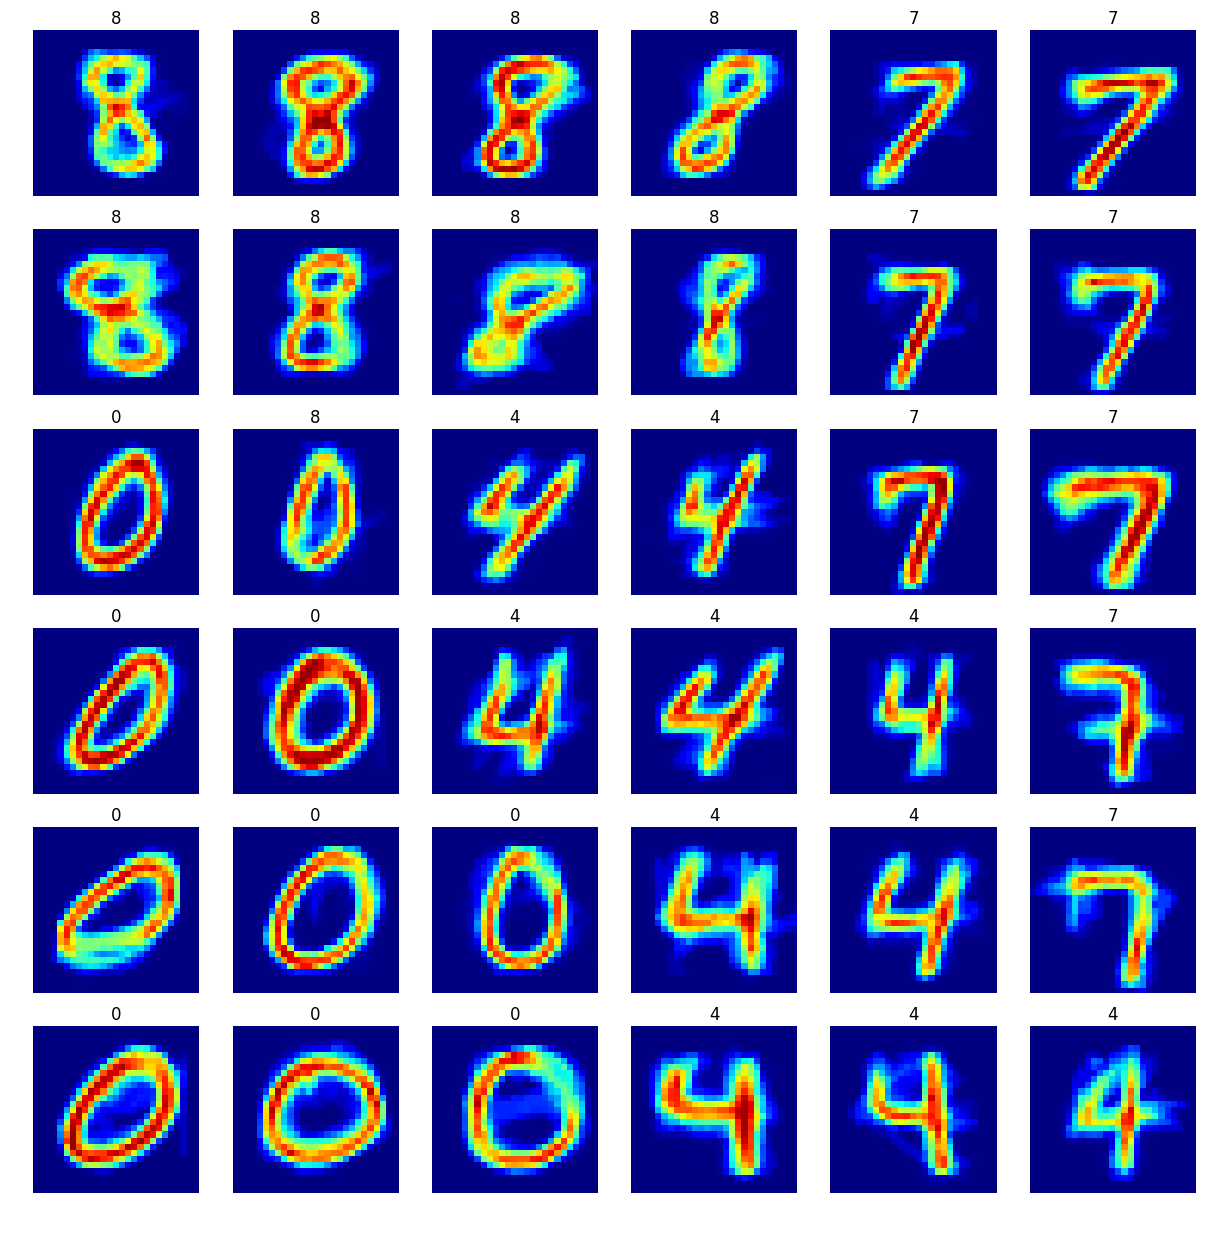

In [7]:
#labels
digits = []
for center in centers:
    rmses = []
    for digit in average_digit:
        rmses.append(distance_btw_Sample(center,digit))
    
    digits.append(nameDigit[np.argmin(rmses)])
    
visualizeSample(centers, size_k=6, labels=digits)